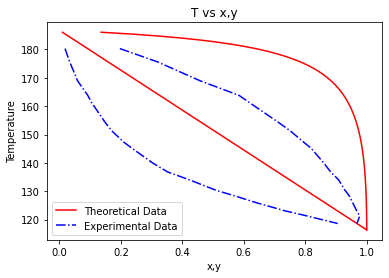

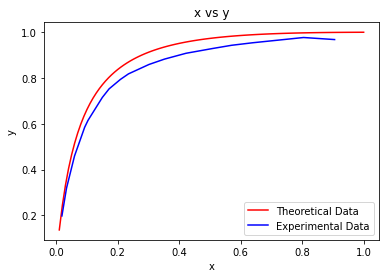

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import math
r = 1.987
#array of x
x_list = np.arange(start = 0.01, stop = 1.01, step = 0.01) 
#array of y 
y_list = np.arange(start = 0.01, stop = 1.01, step = 0.01) 
#array of temperatures
temp_list = np.zeros(100)
p = 730  # p is in mm hg   

#t1sat
t1=(1558.190/(7.83800-math.log(p,10)))-196.881;  
#t2sat
t2=(2692.187/(8.95446-math.log(p,10)))-255.210; 
 
for i in range(100):
  x1=x_list[i]
  x2=1-x_list[i]
  temp_list[i]=x1*t1 + x2*t2
  p1=(10**(7.83800-(1558.190/(196.881+(temp_list[i])))));
  p2=(10**(8.95446-(2692.187/(255.210+(temp_list[i])))));
  
  l12=(73.68/91.96)*math.exp(290.6946/(r*temp_list[i]));
  l21=(91.96/73.68)*math.exp(-848.3203/(r*temp_list[i]));

  g1=math.exp(-math.log(x1+(l12*x2),10)+(x2*((l12/(x1+(l12*x2)))-(l21/(x2+(l21*x1))))));
  g2=math.exp(-math.log(x2+(l12*x1),10)-(x1*((l12/(x1+(l12*x2)))-(l21/(x2+(l21*x1))))));

  p=x1*g1*p1+x2*g2*p2;
  y1=x1*g1*p1/p;
  y2=x2*g2*p2/p; 
  y_list[i] = y1; 

#experimental data
t_exp = [180.30, 175.65, 168.90, 163.80, 161.50, 154.10, 151.15, 147.35, 145.25, 140.10, 136.80, 134.05, 130.35, 128.35, 126.00, 123.10, 121.30, 118.60]
x_exp = [0.0185 ,0.0335 ,0.0595 ,0.0925 ,0.1035 ,0.1500 ,0.1720 ,0.2090 ,0.2350 ,0.3015 ,0.3520 ,0.4220 ,0.5090 ,0.5705 ,0.6390 ,0.7330 ,0.8045 ,0.9055]
y_exp = [0.1970 ,0.3185 ,0.4590 ,0.5845 ,0.6150 ,0.7150 ,0.7525 ,0.7940 ,0.8180 ,0.8590 ,0.8825 ,0.9080 ,0.9290 ,0.9430 ,0.9540 ,0.9670 ,0.9770 ,0.9680]

#plots
plt.plot(x_list, temp_list, color="red", label="Theoretical Data")
plt.plot(x_exp, t_exp,'-.' ,color="blue", label="Experimental Data")
plt.plot(y_list, temp_list, color="red")
plt.plot(y_exp,t_exp,'-.', color="blue")
plt.title("T vs x,y")
plt.xlabel("x,y")
plt.ylabel("Temperature")
plt.legend(loc ="lower left")
plt.show()

print("\n")

plt.plot(x_list,y_list, color="red")
plt.plot(x_exp,y_exp, color="blue")
plt.title("x vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Theoretical Data", "Experimental Data"], loc ="lower right")
plt.show()

